<a href="https://colab.research.google.com/github/yashk2000/LearningPyTorch/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the `nn` module of pytorch

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

## Initializing the data

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

## Spliting into training and validation data 

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0,  3,  5,  4,  9,  2,  8,  1, 10]), tensor([6, 7]))

## Normalizing data

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

## Creating a linear layer

In [5]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-2.6049],
        [-1.4725]], grad_fn=<AddmmBackward>)

## Printing the weights in the linear model

In [6]:
linear_model.weight

Parameter containing:
tensor([[-0.9359]], requires_grad=True)

## Printing the bias in the linear model

In [7]:
linear_model.bias

Parameter containing:
tensor([0.5679], requires_grad=True)

## Calling the module with some input

In [10]:
x = torch.ones(1)
linear_model(x)

tensor([-0.3681], grad_fn=<AddBackward0>)

The above works, but the layers acually expect input in batches. 

In [12]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681],
        [-0.3681]], grad_fn=<AddmmBackward>)

In [13]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [14]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), 
                      lr=1e-2)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x7fe8f3f42258>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.7595]], requires_grad=True), Parameter containing:
 tensor([-0.1605], requires_grad=True)]

In [26]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
  for epoch in range(0, n_epochs):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
      print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

In [18]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [28]:
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer, 
    model = linear_model, 
    loss_fn = nn.MSELoss(), 
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 0, Training loss 1.8387, Validation loss 13.3786
Epoch 1, Training loss 1.8385, Validation loss 13.3842
Epoch 1000, Training loss 1.7384, Validation loss 17.4024
Epoch 2000, Training loss 1.7204, Validation loss 19.2681

Parameter containing:
tensor([[6.1242]], requires_grad=True)
Parameter containing:
tensor([-22.0331], requires_grad=True)


## Constructing a nueral network using the sequential module

In [29]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

### Printing the parameters

In [30]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

### Identifying the parameters by name

In [31]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


### Passing layers as an ordered dict to `sequential`

In [32]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [34]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
  n_epochs = 5000,
  optimizer = optimizer,
  model = seq_model,
  loss_fn = nn.MSELoss(),
  t_u_train = t_un_train,
  t_u_val = t_un_val,
  t_c_train = t_c_train,
  t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 0, Training loss 1.6158, Validation loss 6.6585
Epoch 1, Training loss 1.6153, Validation loss 7.2762
Epoch 1000, Training loss 1.5485, Validation loss 6.8275
Epoch 2000, Training loss 1.5371, Validation loss 6.9628
Epoch 3000, Training loss 1.5344, Validation loss 7.0096
Epoch 4000, Training loss 1.5329, Validation loss 7.0265
output tensor([[-0.4396],
        [-5.4869]], grad_fn=<AddmmBackward>)
answer tensor([[ 3.],
        [-4.]])
hidden tensor([[-0.0044],
        [ 0.0023],
        [-0.0025],
        [-0.0024],
        [-0.0015],
        [ 0.0020],
        [ 0.0006],
        [-0.0036]])


## Comparing the performance

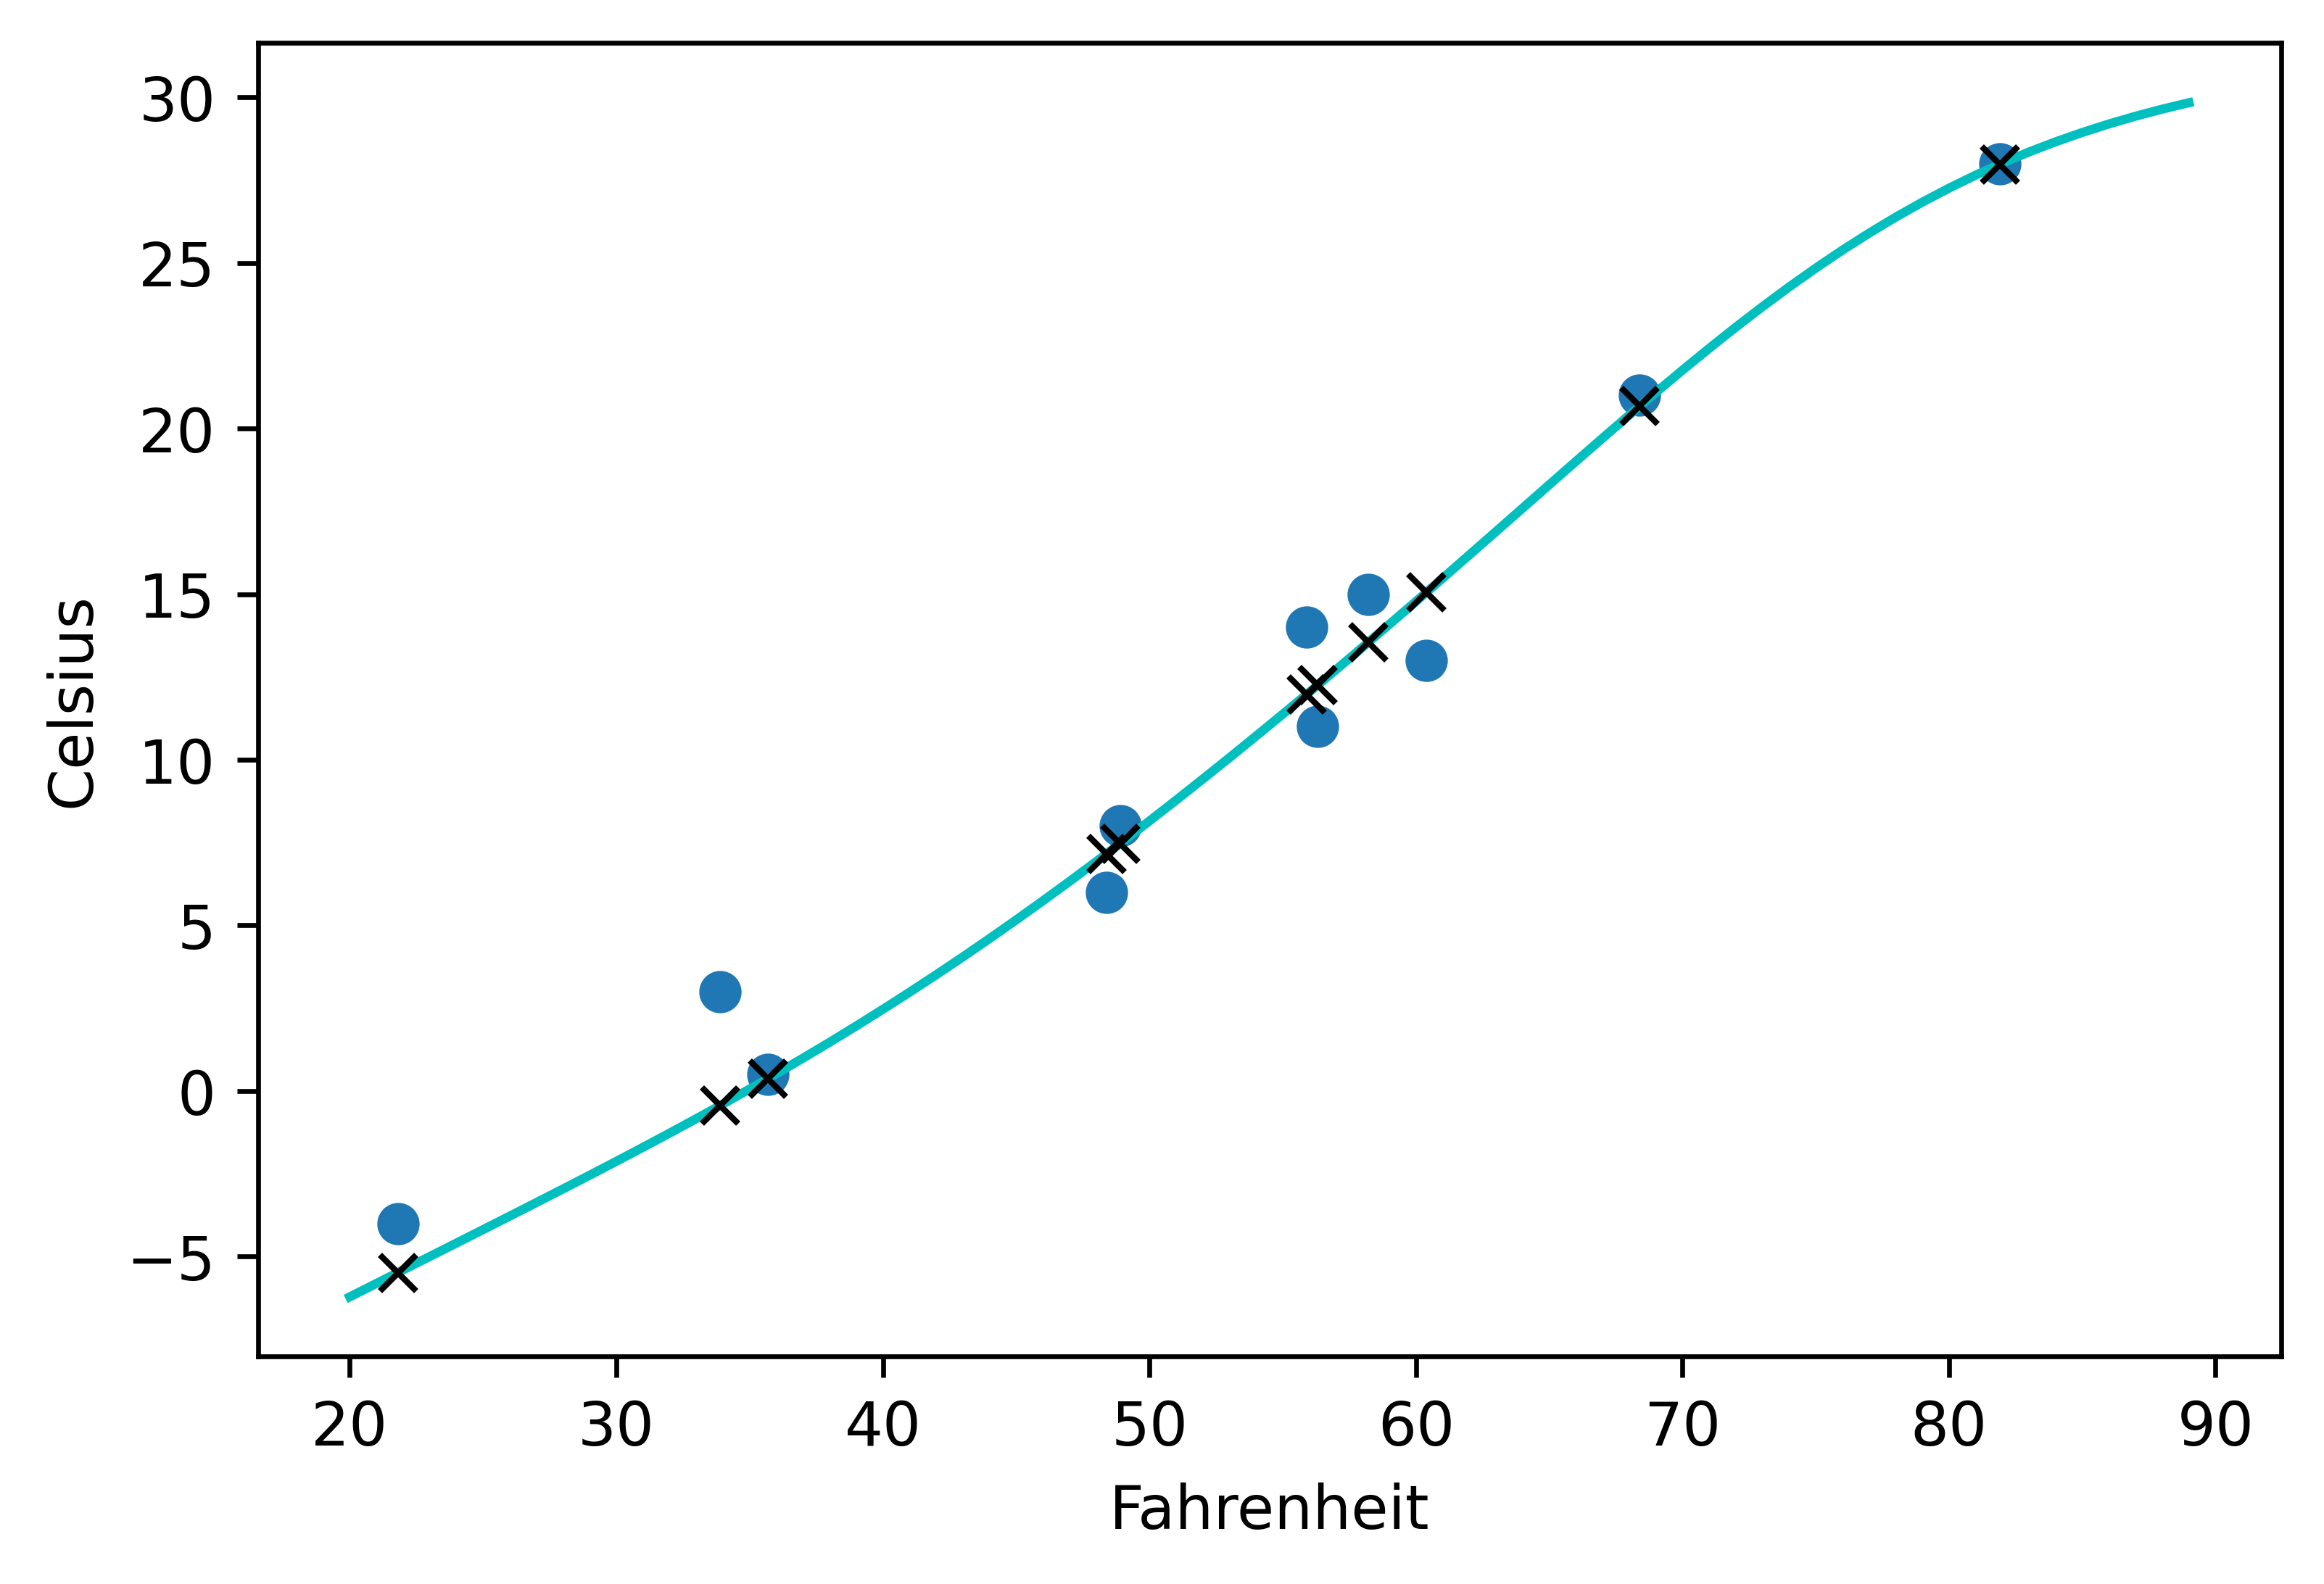

In [35]:
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')